# Pair programming Estadística Descriptiva

## Ejercicios estadística descriptiva

En este caso usaremos el mismo DataFrame que hemos estado usando en los últimos pairs. El ejercicio que os planteamos es:

Eres un analista de df que trabaja para una organización internacional que se enfoca en el desarrollo y el bienestar de los países. Tu objetivo es realizar un análisis inicial de estadísticas descriptivas sobre varios países utilizando el conjunto de df proporcionado.

Objetivo: Realizar un análisis de estadísticas descriptivas para comprender mejor la situación de los países en términos de diversos indicadores.

Instrucciones:


In [1]:
# importamos las librerías que necesitamos

# Tratamiento de df
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from scipy.stats import shapiro, kstest
import warnings
warnings.filterwarnings("ignore")

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.float_format', '{:.2f}'.format) # redondea numeros decimales 

C:\Users\karin\AppData\Local\Temp\ipykernel_9548\1921753545.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("files/world_data_full_apply_nulos.csv", index_col=0)
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.00,AF,58.10,652.23,323.00,32.49,93.00,Kabul,8.67,149.90,2.30,AFN,4.47,2.10,0.70,19101353833.00,104.00,9.70,47.90,Kabul,64.50,638.00,0.43,Pashto,78.40,0.28,NaN,48.90,9.30,71.40,11.12,NaN,33.94,67.71,Asia
1,Albania,105.00,AL,43.10,28.75,9.00,11.78,355.00,Tirana,4.54,119.05,1.40,ALL,1.62,28.10,1.36,15278077447.00,107.00,55.00,7.80,Tirana,78.50,15.00,1.12,Albanian,56.90,1.20,NaN,55.70,18.60,36.60,12.33,NaN,41.15,20.17,Europe
2,Algeria,18.00,DZ,17.40,NaN,317.00,24.28,213.00,Algiers,150.01,151.36,2.00,DZD,3.02,0.80,0.28,169988236398.00,109.90,51.40,20.10,Algiers,76.70,112.00,0.95,Arabic,28.10,1.72,NaN,41.20,37.20,66.10,11.70,NaN,28.03,1.66,Africa
3,Andorra,164.00,AD,40.00,468.00,NaN,7.20,376.00,Andorra la Vella,469.00,NaN,NaN,EUR,1.27,34.00,1.51,3154057987.00,106.40,NaN,2.70,Andorra la Vella,NaN,NaN,6.63,Catalan,36.40,3.33,77.14,NaN,NaN,NaN,NaN,67.87,42.51,1.52,Europe
4,Angola,26.00,AO,47.50,NaN,117.00,40.73,244.00,Luanda,34.69,261.73,17.10,AOA,5.52,46.30,0.97,94635415870.00,113.50,9.30,51.60,Luanda,60.80,241.00,0.71,Portuguese,33.40,0.21,NaN,77.50,9.20,49.10,6.89,NaN,-11.20,17.87,Africa



1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:

Media

Mediana

Desviación estándar

Mínimo

Máximo


In [3]:
# Clasificamos el data frame en numéricos 
df_numeric = df.select_dtypes(include=np.number)
df_numeric

,density,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
0,60.00,58.10,652.23,323.00,32.49,93.00,8.67,149.90,2.30,4.47,2.10,0.70,19101353833.00,104.00,9.70,47.90,64.50,638.00,0.43,78.40,0.28,NaN,48.90,9.30,71.40,11.12,NaN,33.94,67.71
1,105.00,43.10,28.75,9.00,11.78,355.00,4.54,119.05,1.40,1.62,28.10,1.36,15278077447.00,107.00,55.00,7.80,78.50,15.00,1.12,56.90,1.20,NaN,55.70,18.60,36.60,12.33,NaN,41.15,20.17
2,18.00,17.40,NaN,317.00,24.28,213.00,150.01,151.36,2.00,3.02,0.80,0.28,169988236398.00,109.90,51.40,20.10,76.70,112.00,0.95,28.10,1.72,NaN,41.20,37.20,66.10,11.70,NaN,28.03,1.66
3,164.00,40.00,468.00,NaN,7.20,376.00,469.00,NaN,NaN,1.27,34.00,1.51,3154057987.00,106.40,NaN,2.70,NaN,NaN,6.63,36.40,3.33,77.14,NaN,NaN,NaN,NaN,67.87,42.51,1.52
4,26.00,47.50,NaN,117.00,40.73,244.00,34.69,261.73,17.10,5.52,46.30,0.97,94635415870.00,113.50,9.30,51.60,60.80,241.00,0.71,33.40,0.21,NaN,77.50,9.20,49.10,6.89,NaN,-11.20,17.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,32.00,24.50,912.05,343.00,17.88,58.00,164.18,NaN,254.90,2.27,52.70,0.00,482359318768.00,97.20,79.30,21.40,72.10,125.00,0.01,45.80,1.92,NaN,59.70,NaN,73.30,8.80,NaN,6.42,-66.59
191,314.00,39.30,331.21,522.00,16.75,84.00,192.67,163.52,2.80,2.05,48.10,0.80,261921244843.00,110.60,28.50,16.50,75.30,43.00,0.73,43.50,0.82,NaN,77.40,19.10,37.60,2.01,NaN,14.06,108.28
192,56.00,44.60,527.97,40.00,30.45,967.00,10.61,157.58,8.10,3.79,1.00,0.92,26914402224.00,93.60,10.20,42.90,66.10,164.00,NaN,81.00,0.31,NaN,38.00,NaN,26.60,12.91,NaN,15.55,48.52
193,25.00,32.10,752.62,16.00,36.19,260.00,5.14,212.31,9.20,4.63,65.20,1.40,23064722446.00,98.70,4.10,40.40,63.50,213.00,0.24,27.50,1.19,NaN,74.60,16.20,15.60,11.43,NaN,-13.13,27.85


In [4]:
# Extraemos descripción estadística del dataframe numérico 
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
density,195.00,134.50,157.31,1.26,26.17,83.00,165.50,847.00
agricultural_land,188.00,39.12,21.78,0.60,21.70,39.60,55.38,82.60
land_area,165.00,255.21,258.39,0.00,41.28,148.46,430.00,964.00
armed_forces_size,166.00,103.78,167.16,0.00,10.25,28.50,128.25,936.00
birth_rate,189.00,20.21,9.95,5.90,11.30,17.95,28.75,46.08
calling_code,194.00,360.55,323.24,1.00,82.50,255.50,506.75,1876.00
co2-emissions,183.00,125.92,181.79,1.02,7.60,34.48,185.03,727.97
cpi,175.00,144.19,54.78,99.03,113.67,124.74,155.93,550.93
cpi_change,179.00,6.72,24.45,-4.30,1.00,2.30,4.25,254.90
fertility_rate,188.00,2.70,1.28,0.98,1.71,2.25,3.60,6.91


In [5]:
df.head(2)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.00,AF,58.10,652.23,323.00,32.49,93.00,Kabul,8.67,149.90,2.30,AFN,4.47,2.10,0.70,19101353833.00,104.00,9.70,47.90,Kabul,64.50,638.00,0.43,Pashto,78.40,0.28,NaN,48.90,9.30,71.40,11.12,NaN,33.94,67.71,Asia
1,Albania,105.00,AL,43.10,28.75,9.00,11.78,355.00,Tirana,4.54,119.05,1.40,ALL,1.62,28.10,1.36,15278077447.00,107.00,55.00,7.80,Tirana,78.50,15.00,1.12,Albanian,56.90,1.20,NaN,55.70,18.60,36.60,12.33,NaN,41.15,20.17,Europe



2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de df.


In [6]:
# Agrupamos por países y hacemos suma total de densidad
densidad = df.groupby("country")["density"].sum()
densidad

country
Afghanistan    60.00
Albania       105.00
Algeria        18.00
Andorra       164.00
Angola         26.00
               ...  
Venezuela      32.00
Vietnam       314.00
Yemen          56.00
Zambia         25.00
Zimbabwe       38.00
Name: density, Length: 195, dtype: float64

In [7]:
# Sacamos el país con máxima densidad 
max = densidad.idxmax()
max

'Palestinian National Authority'

In [8]:
# Realizamos lo mismo con población 
pop= df.groupby("country")["population"].sum()
pop

country
Afghanistan    0.00
Albania        0.00
Algeria        0.00
Andorra       77.14
Angola         0.00
               ... 
Venezuela      0.00
Vietnam        0.00
Yemen          0.00
Zambia         0.00
Zimbabwe       0.00
Name: population, Length: 195, dtype: float64

In [9]:
# Sacamos el país con menor población 
min = pop.idxmin()
min

'Afghanistan'


3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de df.


In [10]:
# Agrupamos por países y hacemos la media (promedio) de la tasa de natalidad 
totalidad = df.groupby("country")["birth_rate"].mean().reset_index()
totalidad.head(10)

,country,birth_rate
0,Afghanistan,32.49
1,Albania,11.78
2,Algeria,24.28
3,Andorra,7.20
4,Angola,40.73
5,Antigua and Barbuda,15.33
6,Argentina,17.02
7,Armenia,13.99
8,Australia,12.60
9,Austria,9.70



4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.


In [11]:
# Vemos los valores de la tasa de mortalidad infantil 
df["infant_mortality"].value_counts()

infant_mortality
3.60     4
3.10     4
6.10     4
9.80     3
2.70     3
        ..
39.10    1
31.30    1
62.60    1
11.80    1
33.90    1
Name: count, Length: 144, dtype: int64

In [12]:
# Hacemos la media, mediana y desviación estandar de la mortalidad infantil 
media_mortalidad = df['infant_mortality'].mean()
mediana_mortalidad = df['infant_mortality'].median()
desviacion_estandar_mortalidad = df['infant_mortality'].std()

# Definimos los umbrales para las categorías alta y baja
umbral_bajo = mediana_mortalidad - desviacion_estandar_mortalidad
umbral_alto = mediana_mortalidad + desviacion_estandar_mortalidad

# Hacemos una función para asignar categorías según la mortalidad es mayor o menor que los umbrales especificados anteriormente 
def asignar_categoria(mortalidad):
    if mortalidad <= umbral_bajo:
        return 'Baja'
    elif mortalidad <= umbral_alto:
        return 'Moderada'
    else:
        return 'Alta'

# Aplicamos la función para asignar categorías
df['categoria_mortalidad_infantil'] = df['infant_mortality'].apply(asignar_categoria)

# Mostramos los resultados
(df[['country', 'infant_mortality', 'categoria_mortalidad_infantil']])

,country,infant_mortality,categoria_mortalidad_infantil
0,Afghanistan,47.90,Alta
1,Albania,7.80,Moderada
2,Algeria,20.10,Moderada
3,Andorra,2.70,Moderada
4,Angola,51.60,Alta
...,...,...,...
190,Venezuela,21.40,Moderada
191,Vietnam,16.50,Moderada
192,Yemen,42.90,Alta
193,Zambia,40.40,Alta



5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación


In [13]:
# Calculamos la correlación entre las variables con el método spearman. 
corr_fer_life = df["fertility_rate"].corr(df["life_expectancy"],method= "spearman") 
corr_fer_life

# Correlacion negativa, mientras la tasa de fertilidad aumenta, la esperanza de vida disminuye. 
# Cuando una variable aumenta, la otra tiende a disminuir. 
# Indica una correlación negativa fuerte. Esto significa que cuando una variable sube, la otra tiende a bajar de manera consistente.

-0.8430472266451204


6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.


In [14]:
# Calculamos la media de la columna CPI 
df["cpi"].mean()

144.19359999999998

In [15]:
# Calculamos la mediana de la columna CPI 
df["cpi"].median()

124.74

Text(0.5, 0, 'CPI')

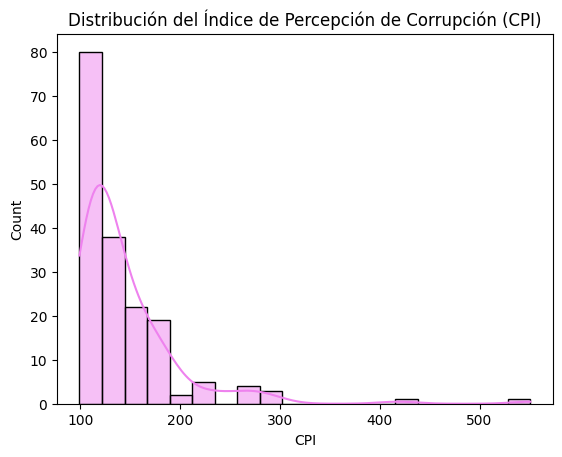

In [16]:
# Veremos los resultados en una gráfica (histograma)
sns.histplot(data = df["cpi"], 
             color = "violet", 
             kde = True, 
             bins = 20 )
plt.title('Distribución del Índice de Percepción de Corrupción (CPI)')
plt.xlabel('CPI')


In [17]:
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent,categoria_mortalidad_infantil
0,Afghanistan,60.00,AF,58.10,652.23,323.00,32.49,93.00,Kabul,8.67,149.90,2.30,AFN,4.47,2.10,0.70,19101353833.00,104.00,9.70,47.90,Kabul,64.50,638.00,0.43,Pashto,78.40,0.28,NaN,48.90,9.30,71.40,11.12,NaN,33.94,67.71,Asia,Alta
1,Albania,105.00,AL,43.10,28.75,9.00,11.78,355.00,Tirana,4.54,119.05,1.40,ALL,1.62,28.10,1.36,15278077447.00,107.00,55.00,7.80,Tirana,78.50,15.00,1.12,Albanian,56.90,1.20,NaN,55.70,18.60,36.60,12.33,NaN,41.15,20.17,Europe,Moderada
2,Algeria,18.00,DZ,17.40,NaN,317.00,24.28,213.00,Algiers,150.01,151.36,2.00,DZD,3.02,0.80,0.28,169988236398.00,109.90,51.40,20.10,Algiers,76.70,112.00,0.95,Arabic,28.10,1.72,NaN,41.20,37.20,66.10,11.70,NaN,28.03,1.66,Africa,Moderada
3,Andorra,164.00,AD,40.00,468.00,NaN,7.20,376.00,Andorra la Vella,469.00,NaN,NaN,EUR,1.27,34.00,1.51,3154057987.00,106.40,NaN,2.70,Andorra la Vella,NaN,NaN,6.63,Catalan,36.40,3.33,77.14,NaN,NaN,NaN,NaN,67.87,42.51,1.52,Europe,Moderada
4,Angola,26.00,AO,47.50,NaN,117.00,40.73,244.00,Luanda,34.69,261.73,17.10,AOA,5.52,46.30,0.97,94635415870.00,113.50,9.30,51.60,Luanda,60.80,241.00,0.71,Portuguese,33.40,0.21,NaN,77.50,9.20,49.10,6.89,NaN,-11.20,17.87,Africa,Alta



7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).


In [24]:
# Agrupamos por paises y realizamos sumas de todos los valores de ambas variables 
gdp = df.groupby("country")["gdp"].sum()
co2 = df.groupby("country")["co2-emissions"].sum()
# Calculamos la diferencia entre ambas variables 
diferencia = gdp - co2 
paises_dif = diferencia.idxmax()
# Imprimos el resultado 
print("País con la mayor diferencia entre GDP y CO2 emissions:")
print(paises_dif)

País con la mayor diferencia entre GDP y CO2 emissions:
United States



8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.


In [29]:
# Para calcular el porcentaje promedio hacemos la suma de la columna population_labor y el promedio de la misma 
total_personas = df.groupby("country")["population_labor_force_participation"].sum()
promedio = df.groupby("country")["population_labor_force_participation"].mean()
# Calculamos el porcentaje 
porcentaje = (promedio/total_personas) * 100 
# Sacamos el porcentaje promedio: 
print(f"El porcentaje promedio de personas que participan en la fuerza laboral es:\n{porcentaje}")



El porcentaje promedio de personas que participan en la fuerza laboral es:
country
Afghanistan   100.00
Albania       100.00
Algeria       100.00
Andorra          NaN
Angola        100.00
               ...  
Venezuela     100.00
Vietnam       100.00
Yemen         100.00
Zambia        100.00
Zimbabwe      100.00
Name: population_labor_force_participation, Length: 195, dtype: float64



9. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.

In [30]:
# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(df_numeric, 2))

# printeamos los resultados, una lista de tuplas
combinaciones

[('density', 'agricultural_land'),
 ('density', 'land_area'),
 ('density', 'armed_forces_size'),
 ('density', 'birth_rate'),
 ('density', 'calling_code'),
 ('density', 'co2-emissions'),
 ('density', 'cpi'),
 ('density', 'cpi_change'),
 ('density', 'fertility_rate'),
 ('density', 'forested_area'),
 ('density', 'gasoline_price'),
 ('density', 'gdp'),
 ('density', 'gross_primary_education_enrollment'),
 ('density', 'gross_tertiary_education_enrollment'),
 ('density', 'infant_mortality'),
 ('density', 'life_expectancy'),
 ('density', 'maternal_mortality_ratio'),
 ('density', 'minimum_wage'),
 ('density', 'out_of_pocket_health_expenditure'),
 ('density', 'physicians_per_thousand'),
 ('density', 'population'),
 ('density', 'population_labor_force_participation'),
 ('density', 'tax_revenue'),
 ('density', 'total_tax_rate'),
 ('density', 'unemployment_rate'),
 ('density', 'urban_population'),
 ('density', 'latitude'),
 ('density', 'longitude'),
 ('agricultural_land', 'land_area'),
 ('agricultu

In [31]:
# creamos una función para identificar si las relaciones entre las variables son lienales o no
def identificar_linealidad (dataframe, lista_combinacion_columnas):
    """
    Identifica si las relaciones entre pares de variables en un DataFrame son lineales o no.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        El DataFrame que contiene las variables a analizar.

    lista_combinacion_columnas : list of tuples
        Una lista de tuplas donde cada tupla contiene dos nombres de columnas del DataFrame que se desea analizar.

    Returns:
    --------
    relaciones_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que tienen una relación lineal.

    relaciones_no_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que no tienen una relación lineal.

    """
    relaciones_lineales = []
    relaciones_no_lineales = []

    for tupla in lista_combinacion_columnas: 
        # Realizar la prueba de normalidad
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")

        if p_value1 > 0.05 and p_value2 > 0.05:
            relaciones_lineales.append(tupla)
        else:
            relaciones_no_lineales.append(tupla)

    return relaciones_lineales, relaciones_no_lineales

# llamamos a la funcion

lineal, no_lineal = identificar_linealidad(df, combinaciones)

print(f"Las variables a las que tengamos que aplicar la correlacion de pearson son: {lineal}")
print(f"Las variables a las que tengamos que aplicar la correlacion de spearman son: {no_lineal}")


Las variables a las que tengamos que aplicar la correlacion de pearson son: []
Las variables a las que tengamos que aplicar la correlacion de spearman son: [('density', 'agricultural_land'), ('density', 'land_area'), ('density', 'armed_forces_size'), ('density', 'birth_rate'), ('density', 'calling_code'), ('density', 'co2-emissions'), ('density', 'cpi'), ('density', 'cpi_change'), ('density', 'fertility_rate'), ('density', 'forested_area'), ('density', 'gasoline_price'), ('density', 'gdp'), ('density', 'gross_primary_education_enrollment'), ('density', 'gross_tertiary_education_enrollment'), ('density', 'infant_mortality'), ('density', 'life_expectancy'), ('density', 'maternal_mortality_ratio'), ('density', 'minimum_wage'), ('density', 'out_of_pocket_health_expenditure'), ('density', 'physicians_per_thousand'), ('density', 'population'), ('density', 'population_labor_force_participation'), ('density', 'tax_revenue'), ('density', 'total_tax_rate'), ('density', 'unemployment_rate'), ('de

In [32]:
# como todas las parejas de variables tienen relaciones no lineales, aplicaremos la correlación de Spearman a todo el DataFrame
df_correlaciones = df.corr(numeric_only = True, method = "spearman")
df_correlaciones

,density,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
density,1.00,0.20,-0.22,0.13,-0.18,-0.11,0.21,-0.12,-0.14,-0.18,-0.02,0.10,-0.00,0.03,-0.01,-0.10,0.14,-0.10,0.06,0.01,0.03,-0.51,-0.09,0.09,0.02,-0.15,-0.36,0.12,0.02
agricultural_land,0.20,1.00,0.02,0.17,0.17,-0.04,0.02,0.25,0.23,0.16,-0.38,0.03,0.08,-0.06,-0.13,0.20,-0.22,0.15,-0.19,0.11,-0.08,-0.14,-0.15,-0.07,0.16,0.06,-0.03,0.00,-0.01
land_area,-0.22,0.02,1.00,0.38,0.18,-0.24,0.17,0.14,0.22,0.18,-0.01,-0.09,0.17,0.02,-0.07,0.22,-0.18,0.18,-0.10,0.11,-0.21,-0.40,0.03,-0.21,0.16,0.01,-0.49,-0.16,0.05
armed_forces_size,0.13,0.17,0.38,1.00,-0.12,-0.24,0.48,0.09,0.08,-0.10,-0.15,-0.20,0.70,-0.00,0.26,-0.10,0.16,-0.13,0.10,0.26,0.12,0.81,-0.12,-0.23,0.16,-0.09,0.48,0.12,0.23
birth_rate,-0.18,0.17,0.18,-0.12,1.00,0.16,-0.25,0.39,0.24,0.98,-0.08,-0.30,-0.42,0.06,-0.79,0.90,-0.86,0.86,-0.66,0.25,-0.85,0.35,0.21,-0.40,0.17,-0.06,0.11,-0.60,0.04
calling_code,-0.11,-0.04,-0.24,-0.24,0.16,1.00,-0.27,0.11,-0.02,0.16,-0.09,-0.14,-0.36,-0.07,-0.23,0.11,-0.15,0.05,-0.15,-0.05,-0.07,0.05,0.08,0.01,-0.33,-0.09,-0.16,-0.04,0.30
co2-emissions,0.21,0.02,0.17,0.48,-0.25,-0.27,1.00,-0.14,-0.13,-0.21,0.00,0.03,0.30,0.08,0.27,-0.25,0.26,-0.29,0.38,-0.18,0.19,-0.35,-0.15,0.02,0.07,-0.00,-0.35,0.14,0.06
cpi,-0.12,0.25,0.14,0.09,0.39,0.11,-0.14,1.00,0.80,0.36,-0.09,-0.33,0.01,0.15,-0.29,0.42,-0.42,0.42,-0.48,0.19,-0.29,0.22,0.04,-0.32,0.09,0.02,0.27,-0.26,0.16
cpi_change,-0.14,0.23,0.22,0.08,0.24,-0.02,-0.13,0.80,1.00,0.22,-0.03,-0.15,0.02,0.04,-0.17,0.28,-0.31,0.27,-0.32,0.16,-0.19,0.20,-0.05,-0.24,0.10,0.16,0.15,-0.10,0.03
fertility_rate,-0.18,0.16,0.18,-0.10,0.98,0.16,-0.21,0.36,0.22,1.00,-0.07,-0.28,-0.42,0.05,-0.76,0.87,-0.84,0.83,-0.60,0.19,-0.82,0.17,0.19,-0.39,0.17,-0.07,-0.02,-0.58,0.04


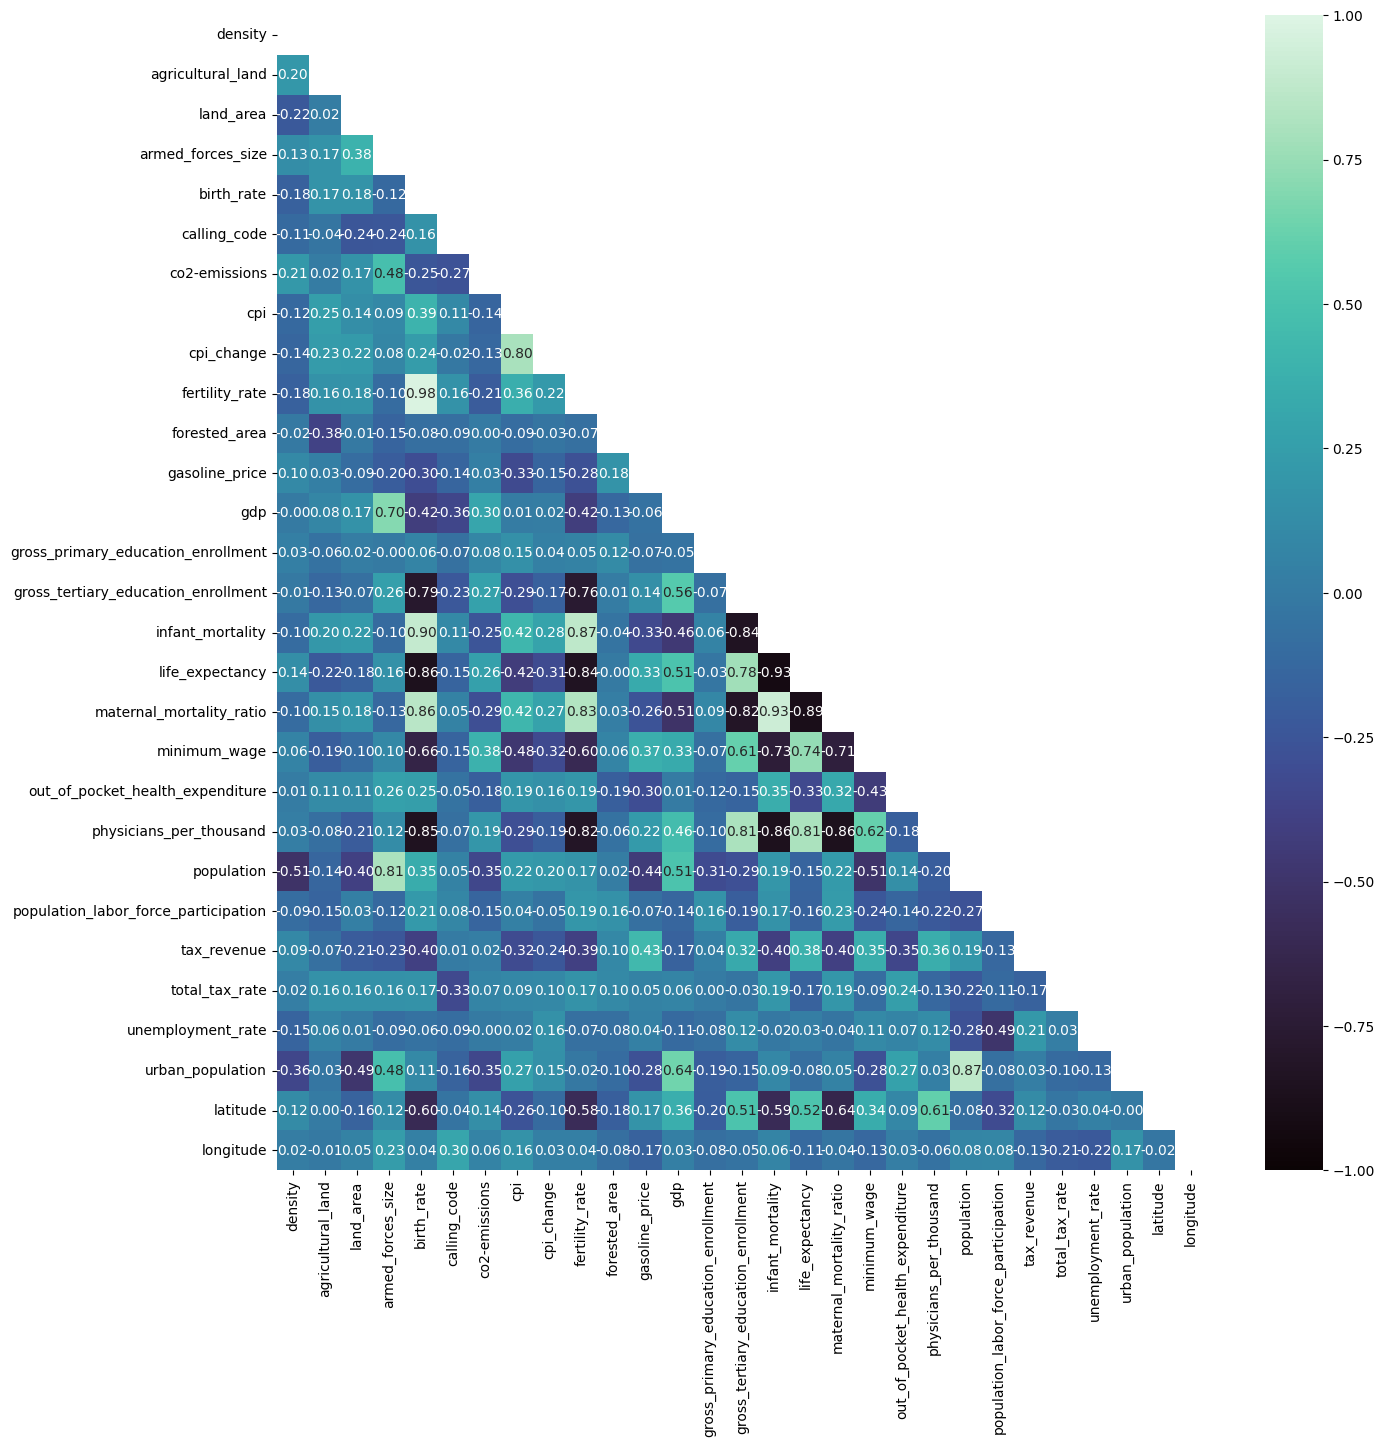

In [33]:
# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 
